Cargar las librerías iniciales

In [224]:
# librerías generales
import pandas as pd
import numpy as np
import scikitplot as skplt # pip install scikitplot
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn import tree
import seaborn as sns

Cargar los datos del archivo

In [225]:
def load_bank_data():
    _raw = pd.read_csv('data/raw/bank-sem-entrenamiento.csv')
    bank_data = pd.DataFrame(_raw)
    bank_data.set_index('cod_cliente', inplace=True)
    return bank_data

def load_final_data():
    _raw = pd.read_csv ('data/raw/bank-sem-aplicacion.csv')
    final_data = pd.DataFrame(_raw)
    final_data.set_index('cod_cliente', inplace = True)
    return final_data


def normalize_data(data):
    scaler = StandardScaler()
    normalized_data = scaler.fit_transform(data)
    return normalized_data

def desnormalize_data(data, scaler):
    desnormalized_data = scaler.inverse_transform(data)
    return desnormalized_data
    #return 1 / numero



Entendimiento del negocio
- Estadísticas 
- Correlaciones


In [226]:
# Cargar los datos 
bank_data = load_bank_data()
bank_data.head()


,edad_cliente,margen_beneficio,sdo_financiacion,sdo_inversion,sdo_inversion_fuera_bal,sdo_inversion_no_T1,sdo_financiacion_no_T1,imp_domiciliaciones_cargo,imp_cuota_pres_hip,imp_tarj_credito,...,sdo_avales,sdo_pres_hipotecarios,sdo_pres_personales,sdo_valores,imp_movimientos_cargo,imp_movimientos_abono,num_movimientos_cargo,num_movimientos_abono,num_accesos_banca_elec,flag
cod_cliente,,,,,,,,,,,,,,,,,,,,,
Client65,42,14.70,3217.68,334.04,0.00,334.04,3217.68,183.92,0.0,0.00,...,0.0,0.0,3217.68,0.0,-967.72,372.00,10,5,21,S
Client121,27,133.94,33238.77,220.21,1792.24,220.21,33238.77,31.19,0.0,622.22,...,0.0,0.0,33118.55,0.0,-320.29,1132.14,5,3,0,S
Client173,39,109.07,7054.84,1248.12,0.00,1248.12,7054.84,711.63,0.0,759.08,...,0.0,0.0,5445.42,0.0,-42.38,347.00,3,3,14,S
Client307,52,24.14,15956.21,1690.88,0.00,1690.88,15956.21,711.65,0.0,749.00,...,0.0,0.0,15859.21,0.0,-444.21,1856.86,8,3,4,N
Client359,28,92.13,4273.46,469.44,0.00,469.44,4273.46,135.34,0.0,0.00,...,0.0,0.0,4273.46,0.0,-302.49,973.93,6,3,0,S


In [227]:
bank_data.describe

<bound method NDFrame.describe of              edad_cliente  margen_beneficio  sdo_financiacion  sdo_inversion   
cod_cliente                                                                    
Client65               42             14.70           3217.68         334.04  \
Client121              27            133.94          33238.77         220.21   
Client173              39            109.07           7054.84        1248.12   
Client307              52             24.14          15956.21        1690.88   
Client359              28             92.13           4273.46         469.44   
...                   ...               ...               ...            ...   
Client76027            47             45.21          17964.92         964.09   
Client76115            58              7.02              0.00           7.29   
Client76196            45              4.06            581.84        1739.74   
Client76350            31           -372.91              0.00       15554.15   
Client

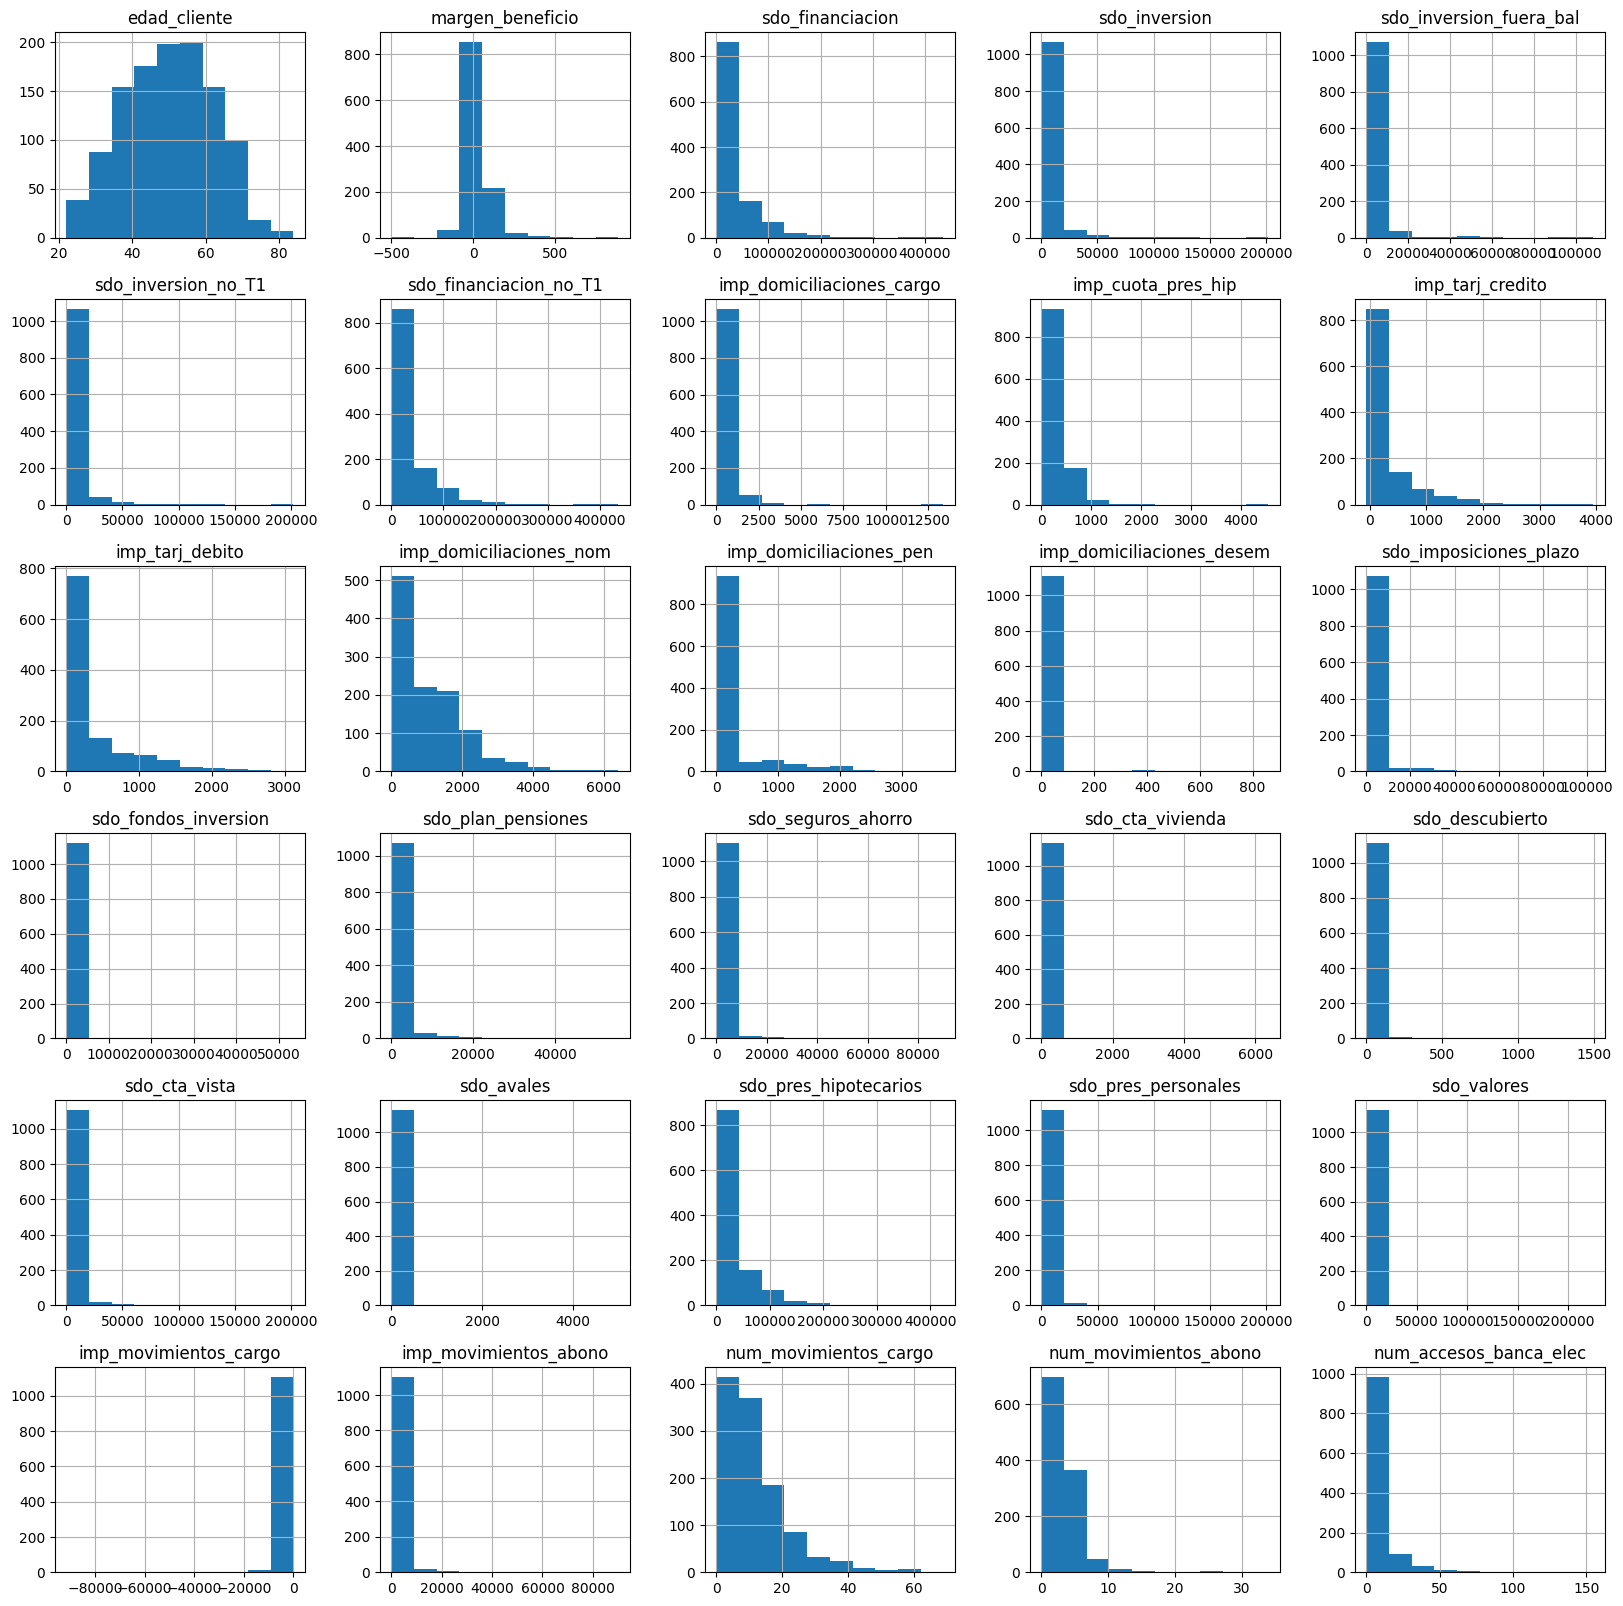

In [228]:
bank_data.hist(figsize=(20, 20))
plt.show()
#bank_data.histo


In [229]:
# identificar clase objetivo y variables independientes

X = bank_data.loc[:, bank_data.columns != 'flag']  ## consultar mañana
y = bank_data['flag']

# partir en train y test
np.random.seed(123)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# modelo de preprocesamiento obtenido desde el conjunto de entrenamiento
md_prepro = StandardScaler()
md_prepro.fit(X_train)

StandardScaler()

In [230]:
# escalamos conjunto entrenamiento
X_train_scaled = md_prepro.transform(X_train)

# visualizamos estadísticas
df_describe = pd.DataFrame(X_train_scaled)
df_describe.describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,7.930000e+02,7.930000e+02,7.930000e+02,7.930000e+02,7.930000e+02,7.930000e+02,7.930000e+02,7.930000e+02,7.930000e+02,7.930000e+02,...,7.930000e+02,7.930000e+02,7.930000e+02,7.930000e+02,7.930000e+02,7.930000e+02,7.930000e+02,7.930000e+02,7.930000e+02,7.930000e+02
mean,-2.419250e-16,-2.688056e-17,-8.960186e-18,4.592095e-17,4.480093e-18,2.688056e-17,3.584074e-17,-3.136065e-17,-5.376111e-17,-8.960186e-18,...,5.376111e-17,-1.792037e-17,1.792037e-17,2.688056e-17,5.600116e-18,2.688056e-17,-1.568033e-17,7.616158e-17,2.352049e-17,-1.120023e-18
std,1.000631e+00,1.000631e+00,1.000631e+00,1.000631e+00,1.000631e+00,1.000631e+00,1.000631e+00,1.000631e+00,1.000631e+00,1.000631e+00,...,1.000631e+00,1.000631e+00,1.000631e+00,1.000631e+00,1.000631e+00,1.000631e+00,1.000631e+00,1.000631e+00,1.000631e+00,1.000631e+00
min,-2.318882e+00,-7.315980e+00,-6.208709e-01,-4.159908e-01,-2.654670e-01,-4.095551e-01,-6.219428e-01,-7.260832e-01,-6.386445e-01,-6.488852e-01,...,-3.868603e-01,-4.427792e-02,-5.727428e-01,-2.590310e-01,-5.161717e-02,-1.901675e+01,-3.219349e-01,-1.155814e+00,-1.074057e+00,-4.625853e-01
25%,-7.437233e-01,-3.508370e-01,-6.186005e-01,-3.866998e-01,-2.654670e-01,-3.805978e-01,-6.196394e-01,-6.082595e-01,-6.386445e-01,-5.258414e-01,...,-3.471854e-01,-4.427792e-02,-5.727428e-01,-2.590310e-01,-5.161717e-02,-8.966952e-04,-3.219349e-01,-6.574664e-01,-1.074057e+00,-4.625853e-01
50%,2.404503e-03,-1.788735e-01,-4.769725e-01,-2.959829e-01,-2.654670e-01,-2.938270e-01,-4.681837e-01,-2.944912e-01,-6.386445e-01,-5.258414e-01,...,-2.330936e-01,-4.427792e-02,-5.727428e-01,-2.590310e-01,-5.161717e-02,1.747232e-01,-2.150746e-01,-2.587886e-01,-6.966174e-02,-4.625853e-01
75%,7.485323e-01,3.088399e-01,2.885078e-01,-4.719479e-02,-2.555983e-01,-5.406673e-02,2.833004e-01,1.803191e-01,5.292402e-01,1.508997e-01,...,2.114108e-02,-4.427792e-02,2.927547e-01,-1.482642e-01,-5.161717e-02,2.745006e-01,5.840507e-03,4.388975e-01,2.651368e-01,7.667254e-02
max,2.821109e+00,5.664294e+00,8.267568e+00,1.482868e+01,1.263453e+01,1.420404e+01,8.206259e+00,1.014076e+01,1.273437e+01,6.353501e+00,...,2.177184e+01,2.694894e+01,8.211441e+00,2.191783e+01,2.625382e+01,3.237740e-01,1.889774e+01,4.924023e+00,1.030909e+01,9.985536e+00


---

# ÁRBOL DE DECISION


El algoritmo de árbol de decisión es un método de aprendizaje supervisado utilizado en el campo de la ciencia de datos y el aprendizaje automático para la clasificación y la regresión. Utiliza una estructura de árbol donde cada nodo interno representa una característica, cada rama representa una decisión basada en esa característica, y cada hoja representa el resultado de una clasificación o regresión.



In [231]:
# construcción del modelo y entrenamiento
np.random.seed(123)
md_tree = DecisionTreeClassifier()

md_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [232]:
# predicción del conjunto de test
y_pred = md_tree.predict(X_test)

# dataframe con datos entrada y prediccion
o_pred = pd.concat([X_test,y_test],axis=1)
o_pred['class_pred']=y_pred
o_pred.head()

,edad_cliente,margen_beneficio,sdo_financiacion,sdo_inversion,sdo_inversion_fuera_bal,sdo_inversion_no_T1,sdo_financiacion_no_T1,imp_domiciliaciones_cargo,imp_cuota_pres_hip,imp_tarj_credito,...,sdo_pres_hipotecarios,sdo_pres_personales,sdo_valores,imp_movimientos_cargo,imp_movimientos_abono,num_movimientos_cargo,num_movimientos_abono,num_accesos_banca_elec,flag,class_pred
cod_cliente,,,,,,,,,,,,,,,,,,,,,
Client22056,52,57.42,11403.18,2400.78,3441.27,2400.78,11403.18,773.02,0.0,1904.95,...,0.00,9124.69,0.00,-19.89,1942.34,5,6,74,S,S
Client14206,43,67.23,816.20,24904.34,0.00,24904.34,816.20,1195.45,0.0,576.60,...,0.00,0.00,0.00,-3880.20,3394.51,28,12,13,N,N
Client14182,42,12.35,0.00,40.45,0.00,40.45,0.00,11.20,0.0,0.00,...,0.00,0.00,0.00,-257.20,268.56,10,3,0,S,S
Client72494,41,74.47,49701.51,5714.95,0.00,5714.95,49701.51,23.00,442.9,0.00,...,49701.51,0.00,2418.05,-464.01,0.00,10,0,20,N,N
Client47681,41,19.24,0.00,318.87,0.00,318.87,0.00,598.95,0.0,0.00,...,0.00,0.00,0.00,-43.35,352.00,3,3,0,S,N


In [233]:
# matriz de confusión y métricas de precisión
print(confusion_matrix(y_test, y_pred))

[[114  56]
 [ 68 102]]


In [234]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           N       0.63      0.67      0.65       170
           S       0.65      0.60      0.62       170

    accuracy                           0.64       340
   macro avg       0.64      0.64      0.63       340
weighted avg       0.64      0.64      0.63       340



In [235]:
# obtención probabilidad de cada clase de la variable objetivo
y_test_proba_predict = md_tree.predict_proba(X_test)
y_test_proba_predict[:5,]

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.]])

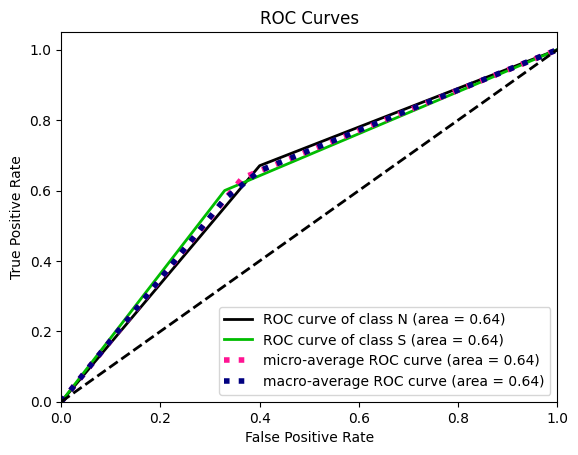

In [236]:
# curva roc
import scikitplot as skplt # %pip install scikit-plot

skplt.metrics.plot_roc(y_true=y_test, y_probas=y_test_proba_predict)
plt.show()

In [237]:
# reglas del arbol
nombres = list(X.columns)
tree_rules = export_text(md_tree, feature_names=nombres)
print(tree_rules)

|--- sdo_pres_personales <= 275.58
|   |--- sdo_inversion <= 1410.18
|   |   |--- margen_beneficio <= -5.58
|   |   |   |--- imp_domiciliaciones_cargo <= 58.43
|   |   |   |   |--- num_accesos_banca_elec <= 38.00
|   |   |   |   |   |--- edad_cliente <= 36.50
|   |   |   |   |   |   |--- sdo_inversion_fuera_bal <= 122.09
|   |   |   |   |   |   |   |--- class: S
|   |   |   |   |   |   |--- sdo_inversion_fuera_bal >  122.09
|   |   |   |   |   |   |   |--- class: N
|   |   |   |   |   |--- edad_cliente >  36.50
|   |   |   |   |   |   |--- imp_cuota_pres_hip <= 247.22
|   |   |   |   |   |   |   |--- imp_cuota_pres_hip <= 229.07
|   |   |   |   |   |   |   |   |--- class: N
|   |   |   |   |   |   |   |--- imp_cuota_pres_hip >  229.07
|   |   |   |   |   |   |   |   |--- class: S
|   |   |   |   |   |   |--- imp_cuota_pres_hip >  247.22
|   |   |   |   |   |   |   |--- class: N
|   |   |   |   |--- num_accesos_banca_elec >  38.00
|   |   |   |   |   |--- class: S
|   |   |   |--- imp_d

[Text(0.6247991276400368, 0.9722222222222222, 'sdo_pres_personales <= 275.58\ngini = 0.5\nsamples = 793\nvalue = [398, 395]'),
 Text(0.37172865013774103, 0.9166666666666666, 'sdo_inversion <= 1410.18\ngini = 0.474\nsamples = 565\nvalue = [347, 218]'),
 Text(0.15013774104683195, 0.8611111111111112, 'margen_beneficio <= -5.58\ngini = 0.49\nsamples = 250\nvalue = [107, 143]'),
 Text(0.06611570247933884, 0.8055555555555556, 'imp_domiciliaciones_cargo <= 58.435\ngini = 0.401\nsamples = 54\nvalue = [39, 15]'),
 Text(0.03673094582185491, 0.75, 'num_accesos_banca_elec <= 38.0\ngini = 0.18\nsamples = 30\nvalue = [27, 3]'),
 Text(0.02938475665748393, 0.6944444444444444, 'edad_cliente <= 36.5\ngini = 0.128\nsamples = 29\nvalue = [27, 2]'),
 Text(0.014692378328741965, 0.6388888888888888, 'sdo_inversion_fuera_bal <= 122.09\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.0073461891643709825, 0.5833333333333334, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.02203856749311295, 0.583333333333

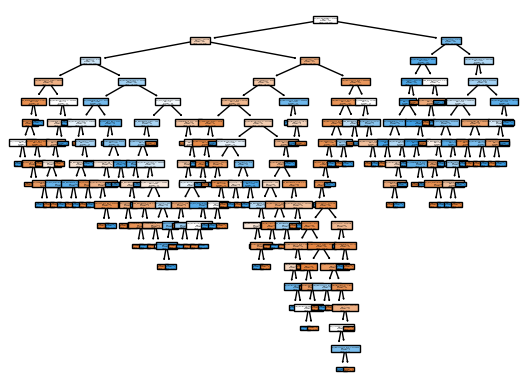

In [238]:
# visualización del árbol
tree.plot_tree(md_tree, feature_names=nombres, filled=True)

---
# KNN

KNN (K-Nearest Neighbors) es un algoritmo de aprendizaje supervisado utilizado para la clasificación y regresión de datos. En el caso de la clasificación, KNN asigna una etiqueta a un nuevo punto de datos basándose en las etiquetas de los puntos de datos vecinos más cercanos. La idea principal detrás de KNN es que los puntos de datos similares tienden a estar cerca unos de otros en el espacio de características.



In [239]:
# construcción del modelo
from sklearn.neighbors import KNeighborsClassifier

# Normalize the data
md_prepro = StandardScaler()
X_train_scaled = md_prepro.fit_transform(X_train)
X_test_scaled = md_prepro.transform(X_test)


np.random.seed(123)
md_knn = KNeighborsClassifier()
md_knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [240]:
# predicción del conjunto de test
y_pred = md_knn.predict(X_test_scaled)

# matriz de confusión y métricas de precisión
print(confusion_matrix(y_test, y_pred))

[[112  58]
 [ 59 111]]


In [241]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           N       0.65      0.66      0.66       170
           S       0.66      0.65      0.65       170

    accuracy                           0.66       340
   macro avg       0.66      0.66      0.66       340
weighted avg       0.66      0.66      0.66       340



In [242]:
# obtención probabilidad de cada clase de la variable objetivo
y_test_proba_predict = md_knn.predict_proba(X_test_scaled)


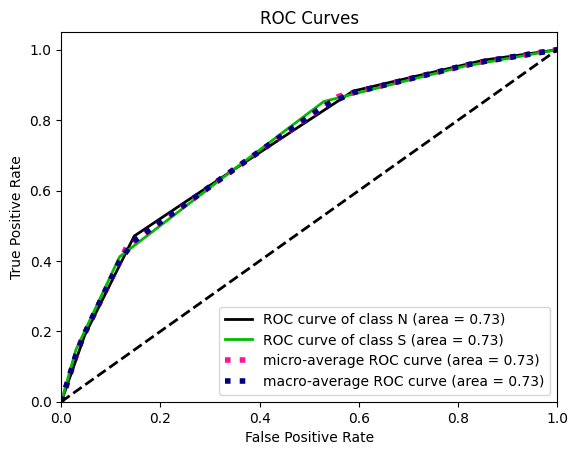

In [243]:
# curva roc
import scikitplot as skplt # %pip install scikit-plot

skplt.metrics.plot_roc(y_true=y_test, y_probas=y_test_proba_predict)
plt.show()

---
# Naive Bayes

Naive Bayes es un algoritmo de aprendizaje automático que se basa en el teorema de Bayes y asume independencia entre las características. Aunque esta suposición puede no ser cierta en todos los casos, Naive Bayes es rápido y efectivo para clasificar grandes conjuntos de datos

In [244]:
#############################################
## NB
#############################################

# construcción del modelo

X_train_desnormalized = md_prepro.inverse_transform(X_train_scaled)
X_test_desnormalized = md_prepro.inverse_transform(X_test_scaled)

from sklearn.naive_bayes import GaussianNB

np.random.seed(123)
md_nb = GaussianNB()
md_nb.fit(X_train_desnormalized, y_train)

GaussianNB()

In [245]:
# predicción del conjunto de test
y_pred = md_nb.predict(X_test)

# matriz de confusión y métricas de precisión
print(confusion_matrix(y_test, y_pred))

[[ 13 157]
 [  4 166]]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


In [246]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           N       0.76      0.08      0.14       170
           S       0.51      0.98      0.67       170

    accuracy                           0.53       340
   macro avg       0.64      0.53      0.41       340
weighted avg       0.64      0.53      0.41       340



In [247]:
# obtención probabilidad de cada clase de la variable objetivo
y_test_proba_predict = md_tree.predict_proba(X_test)

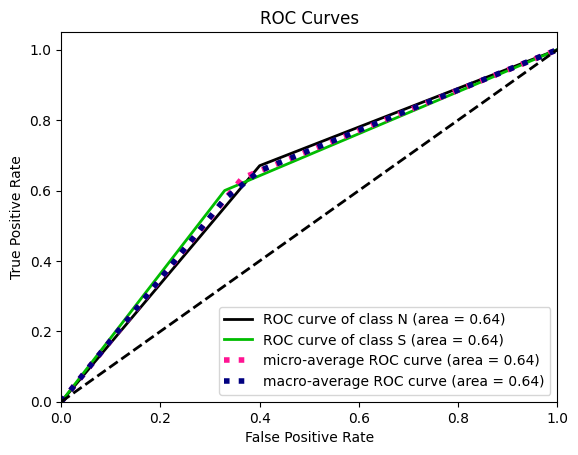

In [248]:
# curva roc
import scikitplot as skplt # %pip install scikit-plot

skplt.metrics.plot_roc(y_true=y_test, y_probas=y_test_proba_predict)
plt.show()

---
# SVM - Support Vector Machines

El algoritmo de Máquinas de Vectores de Soporte (SVM) es una técnica de aprendizaje supervisado utilizada para la clasificación y regresión. Funciona encontrando el hiperplano óptimo que maximiza la separación entre las clases en un espacio multidimensional, incluso en datos no linealmente separables, mediante el uso de vectores de soporte.

In [249]:
#############################################
## SVM
#############################################

# construcción del modelo
from sklearn.svm import SVC

np.random.seed(123)
md_svm = SVC(probability=True)
md_svm.fit(X_train_scaled, y_train)

SVC(probability=True)

In [250]:
# predicción del conjunto de test
y_pred = md_svm.predict(X_test_scaled)

# matriz de confusión y métricas de precisión
print(confusion_matrix(y_test, y_pred))

[[123  47]
 [ 43 127]]


In [251]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           N       0.74      0.72      0.73       170
           S       0.73      0.75      0.74       170

    accuracy                           0.74       340
   macro avg       0.74      0.74      0.74       340
weighted avg       0.74      0.74      0.74       340



In [252]:

# obtención probabilidad de cada clase de la variable objetivo
y_test_proba_predict = md_svm.predict_proba(X_test_scaled)

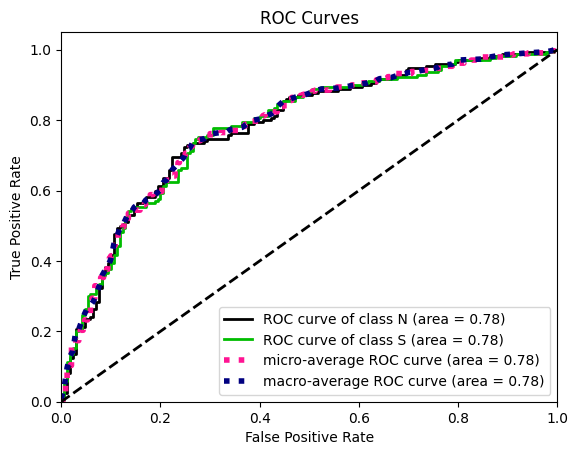

In [253]:
# curva roc
import scikitplot as skplt # %pip install scikit-plot

skplt.metrics.plot_roc(y_true=y_test, y_probas=y_test_proba_predict)
plt.show()

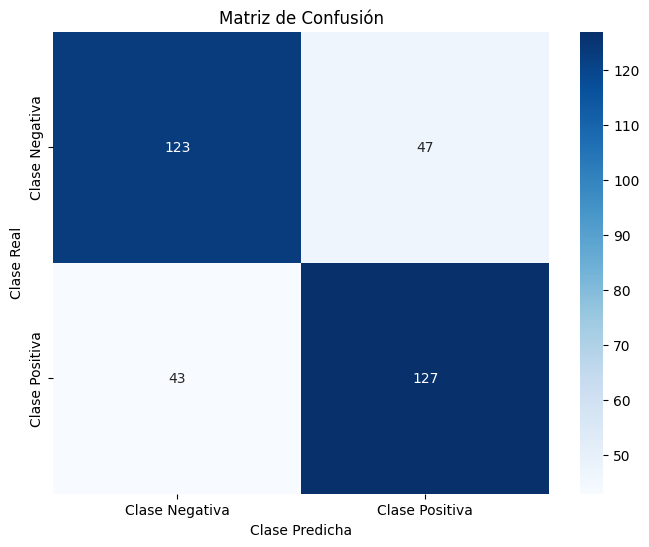

In [254]:
# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Definir etiquetas para los ejes
labels = ['Clase Negativa', 'Clase Positiva']

# Crear el heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Real')
plt.title('Matriz de Confusión')
plt.show()

---
# ANN

El algoritmo de Redes Neuronales Artificiales (ANN) es un enfoque de aprendizaje automático inspirado en la estructura y funcionamiento del cerebro humano. Utiliza una red de nodos interconectados, llamados neuronas artificiales, que trabajan en capas para procesar información y realizar tareas como clasificación, regresión, reconocimiento de patrones, entre otros, mediante la adaptación de pesos entre las conexiones neuronales durante el entrenamiento.

In [210]:
#############################################
## ANN
#############################################

# construcción del modelo
from sklearn.neural_network import MLPClassifier

np.random.seed(123)
md_ann = MLPClassifier(max_iter=600)
md_ann.fit(X_train_scaled, y_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=600)

In [211]:
# predicción del conjunto de test
y_pred = md_ann.predict(X_test_scaled)

# matriz de confusión y métricas de precisión
print(confusion_matrix(y_test, y_pred))

[[126  44]
 [ 51 119]]


In [212]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           N       0.71      0.74      0.73       170
           S       0.73      0.70      0.71       170

    accuracy                           0.72       340
   macro avg       0.72      0.72      0.72       340
weighted avg       0.72      0.72      0.72       340



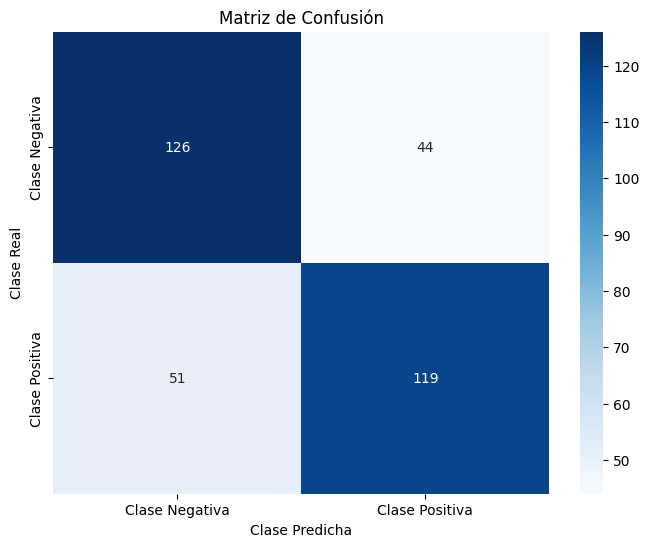

In [213]:

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Definir etiquetas para los ejes
labels = ['Clase Negativa', 'Clase Positiva']

# Crear el heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Real')
plt.title('Matriz de Confusión')
plt.show()

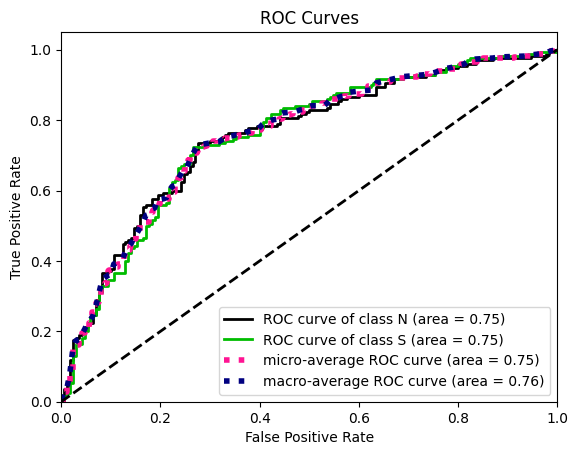

In [214]:
# obtención probabilidad de cada clase de la variable objetivo
y_test_proba_predict = md_ann.predict_proba(X_test_scaled)

# curva roc
import scikitplot as skplt # %pip install scikit-plot

skplt.metrics.plot_roc(y_true=y_test, y_probas=y_test_proba_predict)
plt.show()

---
# Random Forest

El algoritmo de Random Forest es una técnica de aprendizaje automático que se basa en la construcción de múltiples árboles de decisión durante el entrenamiento y la combinación de sus predicciones para obtener una salida final. Cada árbol se construye utilizando una muestra aleatoria del conjunto de datos y una selección aleatoria de características, lo que ayuda a reducir el sobreajuste y mejorar la precisión en la predicción.

In [215]:
#############################################
## Random Forest
#############################################

# construcción del modelo
from sklearn.ensemble import RandomForestClassifier

np.random.seed(123)
md_rf = RandomForestClassifier()
md_rf.fit(X_train, y_train)

RandomForestClassifier()

In [216]:
# predicción del conjunto de test
y_pred = md_rf.predict(X_test)

# matriz de confusión y métricas de precisión
print(confusion_matrix(y_test, y_pred))

[[133  37]
 [ 53 117]]


In [217]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           N       0.72      0.78      0.75       170
           S       0.76      0.69      0.72       170

    accuracy                           0.74       340
   macro avg       0.74      0.74      0.73       340
weighted avg       0.74      0.74      0.73       340



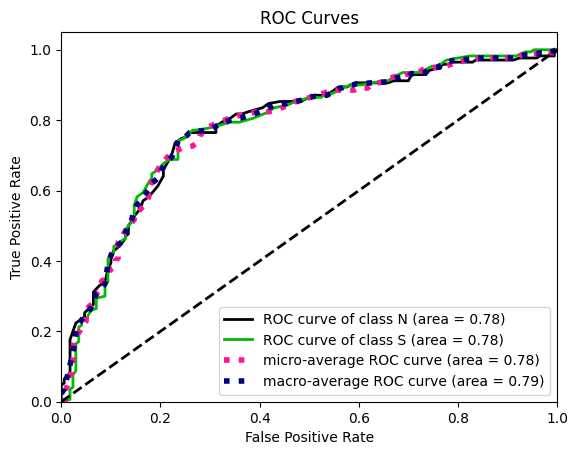

In [218]:
# obtención probabilidad de cada clase de la variable objetivo
y_test_proba_predict = md_rf.predict_proba(X_test)

# curva roc
import scikitplot as skplt # %pip install scikit-plot

skplt.metrics.plot_roc(y_true=y_test, y_probas=y_test_proba_predict)
plt.show()

---
# XGBoots

El algoritmo de XGBoost (Extreme Gradient Boosting) es una técnica de aprendizaje automático basada en árboles de decisión que se destaca por su eficiencia y precisión en la predicción. Utiliza un proceso de ensamblaje de árboles de decisión débiles, mejorando iterativamente el modelo al minimizar una función de pérdida específica, lo que lo hace especialmente eficaz en conjuntos de datos grandes y complejos.

In [219]:
#############################################
## Xgboots
#############################################

# construcción del modelo
from sklearn.ensemble import GradientBoostingClassifier

np.random.seed(123)
md_xgb = GradientBoostingClassifier()
md_xgb.fit(X_train, y_train)

GradientBoostingClassifier()

In [220]:
# predicción del conjunto de test
y_pred = md_xgb.predict(X_test)

# matriz de confusión y métricas de precisión
print(confusion_matrix(y_test, y_pred))

[[129  41]
 [ 56 114]]


In [221]:

# obtención probabilidad de cada clase de la variable objetivo
y_test_proba_predict = md_xgb.predict_proba(X_test)

In [222]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           N       0.70      0.76      0.73       170
           S       0.74      0.67      0.70       170

    accuracy                           0.71       340
   macro avg       0.72      0.71      0.71       340
weighted avg       0.72      0.71      0.71       340



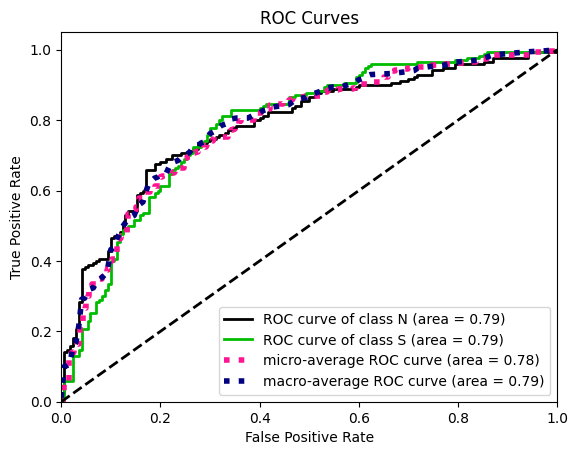

In [223]:
# curva roc
import scikitplot as skplt # %pip install scikit-plot

skplt.metrics.plot_roc(y_true=y_test, y_probas=y_test_proba_predict)
plt.show()

---
# Aplicación a set de datos

In [255]:
# Cargar el set de datos para aplicar el modelo ganador
final_data = load_final_data()



In [264]:
# Predicción del conjunto de datos para aplicación 
flag_pred = md_svm.predict(final_data)

# Se unen las dos matrices para mostrar el resultado final
final_data['Flag_results'] = flag_pred

# Se exportan los datos a la carpeta final
#file_path = './final/final_data.xlsx'
#data_aplicacion.to_excel(file_path, index=False)

# Se muestran los primeros valores del resultado final
#data_aplicacion.head()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


ValueError: could not convert string to float: 'S'